# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d100/2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Hammersmith, Hammersmith and Fulham, United Kingdom**, and the stations the data comes from are shown on the map below.

In [17]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(100,'2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7')

In [4]:
import pandas as pd
filename = 'data/C2A2_data/BinnedCsvs_d100/2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7.csv'
data = pd.read_csv(filename)
data['Temperature Celsius'] = data['Data_Value']*0.1
del data['Data_Value']

data.head()

,ID,Date,Element,Temperature Celsius
0,UKM00003257,2007-06-09,TMIN,0.0
1,NLE00113706,2010-06-15,TMIN,11.4
2,UKM00003740,2015-05-21,TMIN,5.7
3,NLE00113724,2005-07-22,TMAX,14.8
4,NLE00113736,2008-08-29,TMAX,19.1


In [5]:
# Understand which stations are outliers
temp_range_by_station = data.groupby(['ID']).agg(['min','max'])
print(temp_range_by_station)

                   Date             Element       Temperature Celsius      
                    min         max     min   max                 min   max
ID                                                                         
NLE00113670  2009-03-16  2015-12-31    TMAX  TMIN                -3.8  23.5
NLE00113676  2008-09-12  2015-12-31    TMAX  TMIN                -4.3  27.0
NLE00113706  2009-03-16  2015-12-31    TMAX  TMIN                -2.9  24.6
NLE00113724  2005-01-01  2015-12-31    TMAX  TMIN                -4.1  23.2
NLE00113736  2005-01-01  2015-12-31    TMAX  TMIN                -5.6  28.8
UK000000000  2005-01-01  2014-12-31    TMAX  TMIN               -12.4  32.9
UK000003377  2005-01-01  2015-12-31    TMAX  TMIN               -15.1  33.1
UKM00003257  2005-01-01  2015-12-30    TMAX  TMIN               -15.6  30.6
UKM00003590  2005-01-09  2015-12-31    TMAX  TMIN               -17.8  31.4
UKM00003740  2005-01-01  2015-12-31    TMAX  TMIN                -9.4  34.4
UKM00003772 

In [127]:
# Converted dates for each entry into day of year
import datetime

station_list = ('UKM00003772','UKM00003740','UKM00003862','UKM00003590','UKM00003414','UKM00003502','UKM00003917',
                'UKM00003014','UKM00003017','UKM00003091','UKM00003171','UKM00003257','UKM00003334','UKM00003414',
               'UKM00003502','UKW00015036','UKW00035052','UKW00035036')

data_heathrow = data[data.ID.isin(station_list)].drop('ID',1)

data_heathrow['Date'] = pd.to_datetime(data_heathrow['Date'])
data_heathrow['Month_of_year'] = data_heathrow['Date'].dt.month
data_heathrow['Day_of_month'] = data_heathrow['Date'].dt.day
data_heathrow['Year'] = pd.to_datetime(data_heathrow['Date']).dt.year

# Remove February 29th from 2005 - 2014 data
leap_dates = (data_heathrow['Month_of_year'] == 2) & (data_heathrow['Day_of_month'] == 29)

data_heathrow = data_heathrow[~leap_dates]

heathrow_2015 = data_heathrow[data_heathrow['Year'] == 2015]
heathrow_2005_2014 = data_heathrow[data_heathrow['Year'] < 2015]
min_temp_data_2005_2014 = heathrow_2005_2014[heathrow_2005_2014.Element == 'TMIN'].drop(['Element','Date','Year'],1)
max_temp_data_2005_2014 = heathrow_2005_2014[heathrow_2005_2014.Element == 'TMAX'].drop(['Element','Date','Year'],1)
min_temp_by_month_day_2005_2014 = min_temp_data_2005_2014.groupby(['Month_of_year','Day_of_month']).agg(['min'])
max_temp_by_month_day_2005_2014 = max_temp_data_2005_2014.groupby(['Month_of_year','Day_of_month']).agg(['max'])
min_temp_by_month_day_2015 = heathrow_2015[heathrow_2015.Element == 'TMIN'].groupby(['Date'])['Temperature Celsius'].agg(['min'])
max_temp_by_month_day_2015 = heathrow_2015[heathrow_2015.Element == 'TMAX'].groupby(['Date'])['Temperature Celsius'].agg(['max'])

In [128]:
# start and end dates
str_start = '2015-01-01'
str_end = '2015-12-31'

min_temp_by_month_day_2005_2014['Date'] = pd.date_range(str_start,str_end)
max_temp_by_month_day_2005_2014['Date'] = pd.date_range(str_start,str_end)

min_temp_by_month_day_2005_2014_2 = min_temp_by_month_day_2005_2014.set_index('Date')
max_temp_by_month_day_2005_2014_2 = max_temp_by_month_day_2005_2014.set_index('Date')

min_temp_by_month_day_2005_2014_2.columns = ['min_temp_2005_2014']
max_temp_by_month_day_2005_2014_2.columns = ['max_temp_2005_2014']

min_temp_by_month_day_2005_2014_2.head()

,min_temp_2005_2014
Date,
2015-01-01,-3.3
2015-01-02,-4.3
2015-01-03,-5.7
2015-01-04,-6.0
2015-01-05,-5.9


In [129]:
idx = pd.date_range('2015-01-01', '2015-12-31')
min_temp_by_month_day_2015.index = pd.DatetimeIndex(min_temp_by_month_day_2015.index)
min_temp_by_month_day_2015 = min_temp_by_month_day_2015.reindex(idx, fill_value='NaN')
max_temp_by_month_day_2015.index = pd.DatetimeIndex(max_temp_by_month_day_2015.index)
max_temp_by_month_day_2015 = max_temp_by_month_day_2015.reindex(idx, fill_value='NaN')
min_temp_by_month_day_2015.columns = ['min_temp_2015']
max_temp_by_month_day_2015.columns = ['max_temp_2015']
min_temp_by_month_day_2015.index.names = ['Date']
max_temp_by_month_day_2015.index.names = ['Date']

In [29]:
min_temp_by_month_day_2015.head()

,min_temp_2015
Date,
2015-01-01,2.9
2015-01-02,NaN
2015-01-03,0.9
2015-01-04,-1.4
2015-01-05,-0.8


In [30]:
max_temp_by_month_day_2015.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
max_temp_2015    365 non-null object
dtypes: object(1)
memory usage: 5.7+ KB


In [31]:
# Merge dataframes together
temp_range_2015 = pd.merge(min_temp_by_month_day_2015, max_temp_by_month_day_2015, how='inner', left_index=True, right_index=True)
temp_range_2005_2014 = pd.merge(min_temp_by_month_day_2005_2014_2, max_temp_by_month_day_2005_2014_2, how='inner', left_index=True, right_index=True)
temp_master = pd.merge(temp_range_2015, temp_range_2005_2014, how='inner', left_index=True, right_index=True)
temp_master = temp_master.convert_objects(convert_numeric=True)
temp_master.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,min_temp_2015,max_temp_2015,min_temp_2005_2014,max_temp_2005_2014
Date,,,,
2015-01-01,2.9,NaN,-3.3,13.0
2015-01-02,NaN,NaN,-4.3,11.1
2015-01-03,0.9,7.6,-5.7,12.6
2015-01-04,-1.4,6.1,-6.0,10.6
2015-01-05,-0.8,10.0,-5.9,12.2


In [32]:
# Fill in n/a
temp_master_bfilled = temp_master.fillna(method='bfill').reindex()
temp_master_bfilled.head()

,min_temp_2015,max_temp_2015,min_temp_2005_2014,max_temp_2005_2014
Date,,,,
2015-01-01,2.9,7.6,-3.3,13.0
2015-01-02,0.9,7.6,-4.3,11.1
2015-01-03,0.9,7.6,-5.7,12.6
2015-01-04,-1.4,6.1,-6.0,10.6
2015-01-05,-0.8,10.0,-5.9,12.2


In [151]:
temp_master_bfilled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 4 columns):
min_temp_2015         364 non-null float64
max_temp_2015         365 non-null float64
min_temp_2005_2014    365 non-null float64
max_temp_2005_2014    365 non-null float64
dtypes: float64(4)
memory usage: 14.3 KB


In [33]:
import numpy as np
temp_master_bfilled['record_low'] = np.where(temp_master_bfilled['min_temp_2015'] < temp_master_bfilled['min_temp_2005_2014'], temp_master_bfilled['min_temp_2015'], np.NaN)
temp_master_bfilled['record_high']  = np.where(temp_master_bfilled['max_temp_2015'] > temp_master_bfilled['max_temp_2005_2014'], temp_master_bfilled['max_temp_2015'], np.NaN)
temp_master_bfilled['dates'] = temp_master_bfilled.index
temp_master_bfilled.head()

,min_temp_2015,max_temp_2015,min_temp_2005_2014,max_temp_2005_2014,record_low,record_high,dates
Date,,,,,,,
2015-01-01,2.9,7.6,-3.3,13.0,NaN,NaN,2015-01-01
2015-01-02,0.9,7.6,-4.3,11.1,NaN,NaN,2015-01-02
2015-01-03,0.9,7.6,-5.7,12.6,NaN,NaN,2015-01-03
2015-01-04,-1.4,6.1,-6.0,10.6,NaN,NaN,2015-01-04
2015-01-05,-0.8,10.0,-5.9,12.2,NaN,NaN,2015-01-05


In [15]:
record_lows_only = temp_master_bfilled[['dates','record_low']].dropna()
record_lows_only.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2015-01-02 to 2015-11-23
Data columns (total 2 columns):
dates         131 non-null datetime64[ns]
record_low    131 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


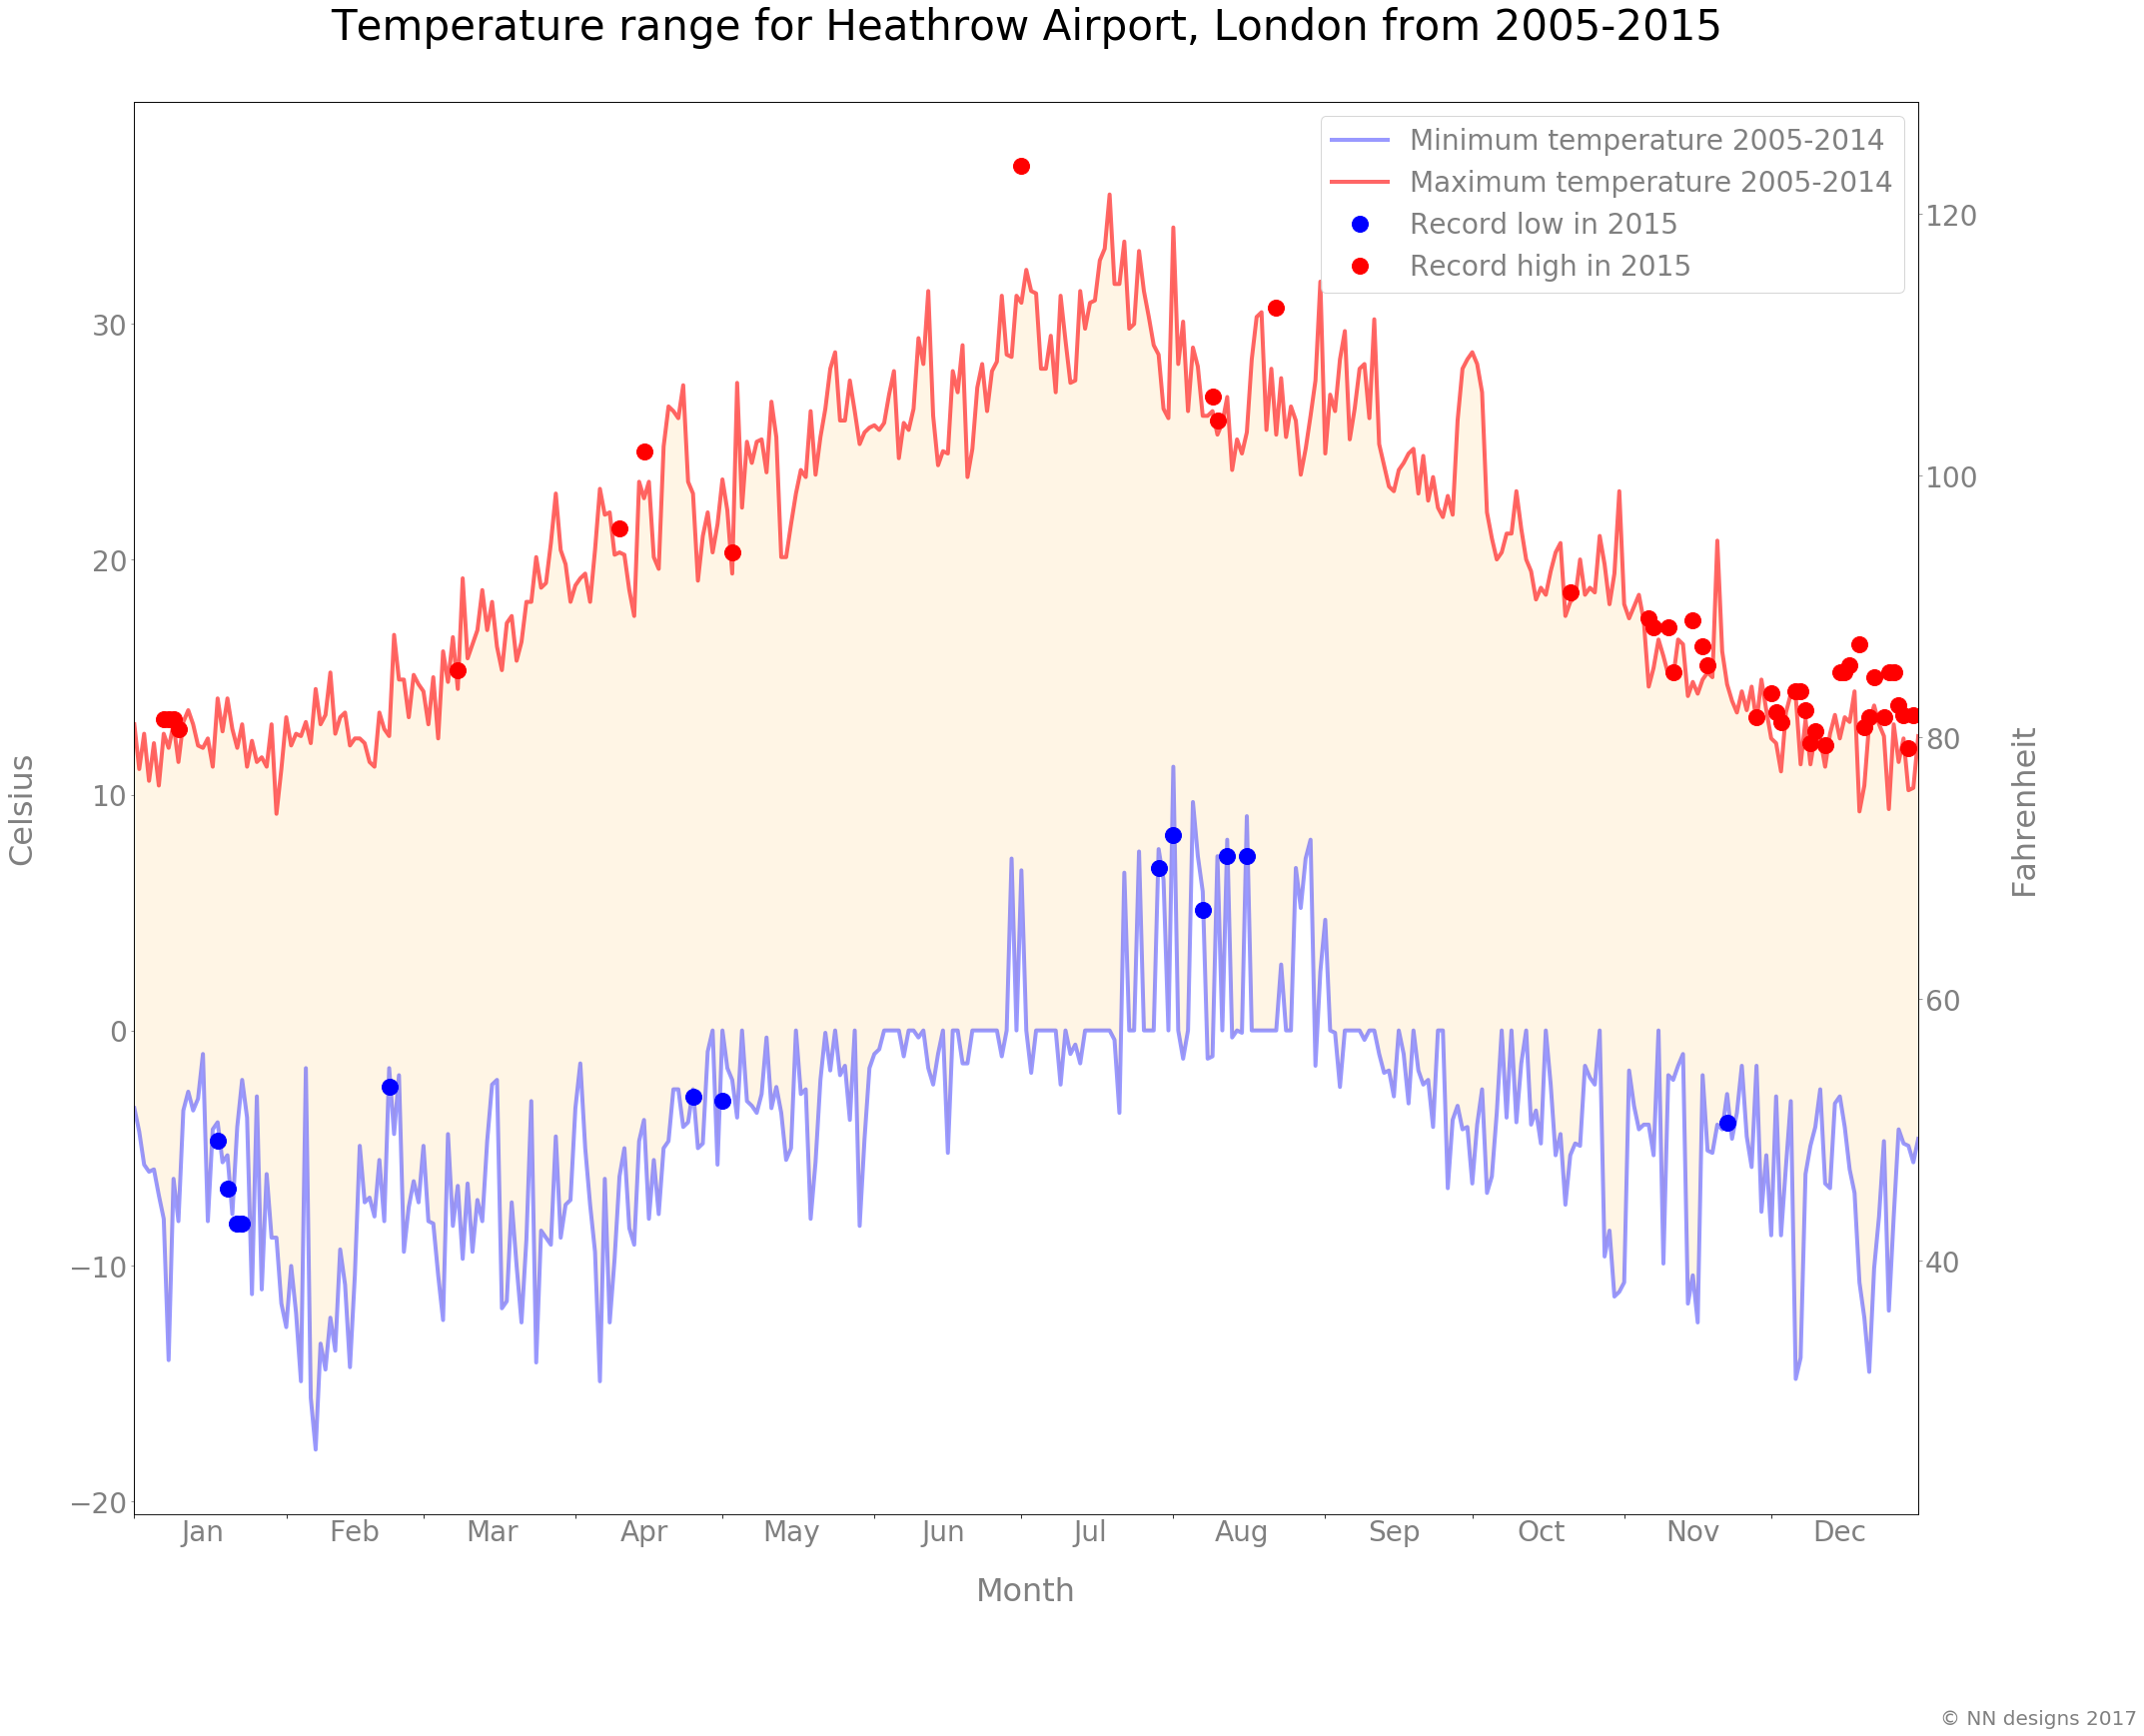

In [118]:
# an accurate title
# correctly labelled axes
# line graph displaying record highs and lows for 2005-2014
# shaded area between the two lines
# overlaid scatter plot indicates days in 2015 that broke a record high or low for 2005-2014
# a legend or sufficient labelling for the line graph and scatter plot

%matplotlib inline
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager

plt.clf()

mpl.rcParams['lines.linewidth'] = 4
plt.rcParams['figure.figsize'] = (32,26)

fig = plt.figure()

SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 36

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# an accurate title
plt.title('Temperature range for Heathrow Airport, London from 2005-2015', fontsize=42, y=1.04)

#plt.gcf().set_tight_layout(True)
plt.xlim(temp_master_bfilled['dates'].min(), temp_master_bfilled['dates'].max())

ax1 = fig.add_subplot(111)     # the Celsius scale
ax2 = ax1.twinx()              # the Fahrenheit scale

def Tf(Tc):
    return (9./5.)*(Tc+32)

def update_ax2(ax1):
   y1, y2 = ax1.get_ylim()
   ax2.set_ylim(Tf(y1), Tf(y2))
   ax2.figure.canvas.draw()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax1.callbacks.connect("ylim_changed", update_ax2)

ax1.plot(temp_master_bfilled['dates'], temp_master_bfilled['min_temp_2005_2014'], color='blue',alpha = 0.4)
ax1.plot(temp_master_bfilled['dates'], temp_master_bfilled['max_temp_2005_2014'], color='red', alpha = 0.6)
ax1.fill_between(temp_master_bfilled['dates'].values,temp_master_bfilled['min_temp_2005_2014'],temp_master_bfilled['max_temp_2005_2014'], facecolor='orange',alpha=0.1)

ax1.plot(temp_master_bfilled['dates'], temp_master_bfilled['record_low'], color='blue', alpha = 1.0, marker='o', markersize=16, linestyle='')
ax1.plot(temp_master_bfilled['dates'], temp_master_bfilled['record_high'], color='red', alpha = 1.0, marker='o', markersize=16, linestyle='')

# add legend
legend = ax1.legend(('Minimum temperature 2005-2014','Maximum temperature 2005-2014','Record low in 2015','Record high in 2015'),
                    loc='upper right')
#plt.legend(fig,, loc='best' framealpha=0.5, prop={'size':'large', 'family': 'monospace'},fontsize=26)

ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax1.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    tick.label1.set_color('grey')

ax1.spines['bottom'].set_color('grey')
ax1.xaxis.label.set_color('grey')
ax1.yaxis.label.set_color('grey')
ax2.yaxis.label.set_color('grey')
ax1.tick_params(axis='y', colors='grey')
ax2.tick_params(axis='y', colors='grey')

# correctly labelled axes
ax1.set_xlabel('Month', fontsize=32, color='grey')
ax1.set_ylabel('Celsius', fontsize=32, color='grey')
ax2.set_ylabel('Fahrenheit', fontsize=32, color='grey')
ax1.xaxis.labelpad = 30
ax1.yaxis.labelpad = 30
ax2.yaxis.labelpad = 30

for text in legend.get_texts():
    text.set_color("grey")
    
plt.figtext(0.995,0.01, u'© NN designs 2017', ha='right', va='bottom', fontsize=20, color='grey')